In [26]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from methods import *

In [27]:
x, y_lon, y_lat=fetch_data("x","y",2333,1,2)

In [28]:
x_scaler, x_scaled = Scaling(x)
lon_scaler, lon_scaled=Scaling(y_lon)
lat_scaler, lat_scaled=Scaling(y_lat)
y_scaled=np.append(lon_scaled,lat_scaled,axis = 1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3) #, random_state=

In [30]:
rfc = RandomForestRegressor(n_estimators=100, max_depth=None, n_jobs=-1)
rfc.fit(x_train, y_train)


param_rand = dict(
    n_estimators=[10], #, 100, 200, 500, 1000, 2000
    max_depth=[None,1, 2,3,4,5], #3,4)
    bootstrap=[True,False],)

clf = RandomizedSearchCV(estimator=rfc, param_distributions=param_rand,scoring='neg_mean_absolute_error',
 n_jobs=2, cv=4, n_iter=12)

search = clf.fit(x, y)





{'n_estimators': 10, 'max_depth': 1, 'bootstrap': True}


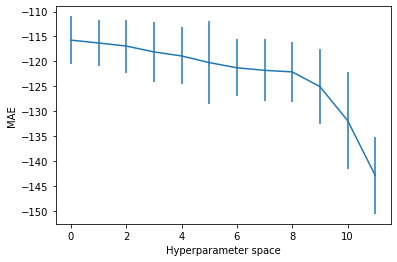

In [31]:
# best hyperparameters
print(search.best_params_)

results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('MAE')
plt.xlabel('Hyperparameter space')

plt.show()


In [32]:

predictions = rfc.predict(x_test)


In [33]:
#modeling final results
pred_lon=inv_scaler(lon_scaler, predictions[:,0])
pred_lat=inv_scaler(lat_scaler, predictions[:,1])

lat_test=inv_scaler(lat_scaler,y_test[:,1].reshape(-1,1))
lon_test=inv_scaler(lon_scaler,y_test[:,0].reshape(-1,1))


Text(0.5, 1.0, 'Combined')

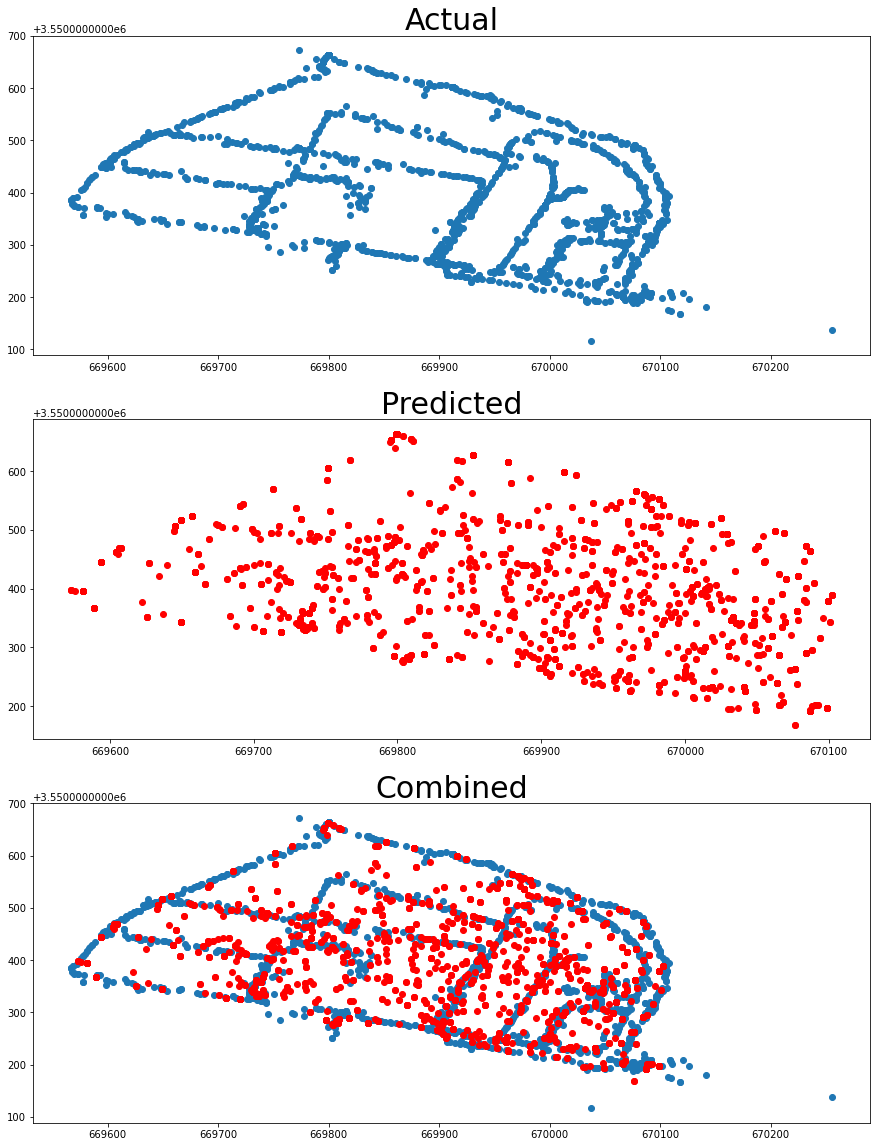

In [34]:
fig, ax = plt.subplots(3)

ax[0].scatter(lon_test,lat_test)
fig.set_size_inches(15,20)
ax[0].set_title("Actual", size= 30)
ax[1].scatter(pred_lon,pred_lat, color="red")
ax[1].set_title("Predicted", size= 30)
ax[2].scatter(lon_test,lat_test)
ax[2].scatter(pred_lon,pred_lat, color="red")
ax[2].set_title("Combined", size= 30)


In [35]:
results, difs_df_sorted=calculate_diff(lon_test,pred_lon,lat_test,pred_lat)

In [36]:
results

,lon_test,pred_lon,lat_test,pred_lat,diff
0,266.040,439.593960,264.883,97.647529,241.015932
1,448.353,464.716522,232.846,230.362839,16.550859
2,508.164,501.866811,370.147,378.299164,10.301086
3,509.718,436.830596,88.411,132.868792,85.376044
4,120.244,142.270996,220.084,237.033500,27.793419
...,...,...,...,...,...
1904,38.453,26.669170,348.402,328.412038,23.204681
1905,493.511,481.346455,238.855,241.729676,12.499597
1906,168.307,168.375384,213.819,214.367797,0.553041
1907,28.231,230.806949,337.548,362.010696,204.047638


In [37]:
difs_df_sorted.describe()

,diff
count,1909.000000
mean,61.190659
std,74.623637
min,0.006880
25%,10.565782
50%,28.039003
75%,86.839355
max,420.003920


In [38]:
print(difs_df_sorted.quantile(q=0.8))
print(difs_df_sorted.quantile(q=0.85))
print(difs_df_sorted.quantile(q=0.9))
print(difs_df_sorted.median())


diff    107.665478
Name: 0.8, dtype: float64
diff    137.312936
Name: 0.85, dtype: float64
diff    176.498237
Name: 0.9, dtype: float64
diff    28.039003
dtype: float64
